# Algorithm Selection and Hyperparameter Tuning

This chapter discusses how to select ML algorithms and their parameters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)

## Algorithm Selection

The [**scikit-learn**](http://scikit-learn.org/stable/) package provides state-of-the art tools for classical machine learning.

![sklearncheat](graphics/third-party/sklearn-cheatsheet.png) **scikit-learn cheat sheet** *Source: [scikit-learn developers](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)*

## Hyperparameter Selection

In the following section we illustrate these essential machine learning concepts:
- **model parameters**
- **model hyperparameters**
- **model complexity**
- **underfitting and overfitting**

###  Model Complexity and Overfitting

Let's generate a simple two-dimensional dataset first:

In [3]:
x = np.linspace(-10, 10)
y = -x**2 + np.random.normal(scale=10.0, size=len(x))

As you can see, we have built in a quadratic relationship between `x` and `y`, and added some normally distributed noise to make it more realistic. Let's look at the data in a scatter plot:

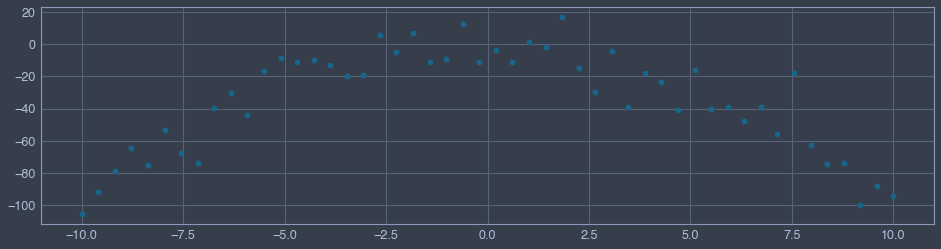

In [4]:
plt.scatter(x, y)

Our task is now to come up with a function $y(x)$ that describes the relationship between $x$ and $y$ well. This function will be useful when we get a new value of $x$ and want a good prediction for the value $y$. So what function should we use?

Remember **polynomials** from math class?

$$y(x) = a_1 x + a_0$$

$$y(x) = a_2 x^2 + a_1 x + a_0$$

$$y(x) = a_2 x^2  a_2 x^2 + a_1 x + a_0$$


We could go on forever, or write it more generally as:

$$y(x) = \sum_{k=0}^n a_k x^k$$

$n$ is what is called the **degree** of the polynomial - the highest power of $x$ that we use for our fitting function. 

We are going to try and fit a polynomial to the data points and see on the plot whether it is a good description of the data. `numpy` and `matplotlib` have some helpful tools for that:

In [5]:
def fit_and_plot(x, y, degree):
    plt.scatter(x, y)
    plt.plot(
        x, 
        np.poly1d(
            np.polyfit(x, y, degree)
        )(x),
        color="red"
    )

`np.polyfit` is a function that tries to fit a polynomial to the given data points `x`, `y`. Its outputs are the estimated **coefficients** of the polynomial. If we give these coefficients to `np.poly1d`, we get the polynomial function `y(x)`. And if we give our x-axis coordinates `x` to this function, we get values on the y-axis.

We have decided to use polynomials, but not which degree the polynomial should have. Let's try out several values for the degree:

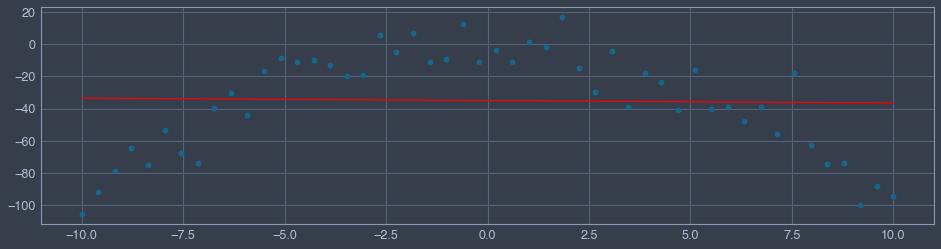

In [6]:
fit_and_plot(x, y, degree=1)

A degree-1-polynomial (also called a **line** in layperson's terms) can be fitted to the data, but the problem is obvious: No line will ever be a good fit for the curved distribution of the data. A line is just too simple and the function $y(x) = a_1 x + a_0$ does not have enough parameters $a_k$ to describe the data well. What we did here is called **underfitting**.

Let's try again:

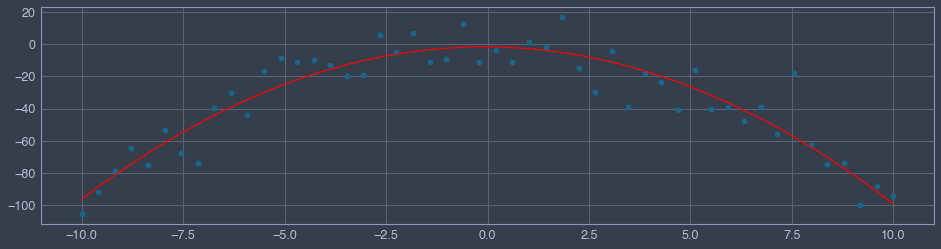

In [7]:
fit_and_plot(x, y, degree=2)

That looks much better. A degree-2-polynomial (or quadratic function) seems to be a good approximation of the data.

(Of course we knew that before because we created the data with this relationship built in, but in real life we usually don't. Of course the relationship is easy to see in 2D, but in real life the data usually has more dimensions.)

So, the more parameters, the better?

/var/folders/pl/9s2ysv_92pn6_2w7j2t40mh00000gn/T/ipykernel_42281/2796986067.py:1: RankWarning: Polyfit may be poorly conditioned
  fit_and_plot(x, y, degree=42)


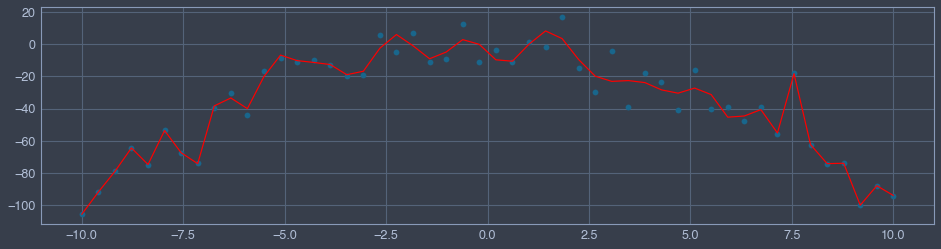

In [8]:
fit_and_plot(x, y, degree=42)

Here we tried to fit a massive degree-42-polynomial to the data, and as a result, we are **overfitting**: The polynomial is so complex that it tries to match every single datapoints exaclty. In effect, it is matching the **noise** rather than the general relationship between the data points. It is almost as if it is trying to memorize every single data point exactly.

Why is this bad? An overfitted function is not going to **generalize** well. It has learned to explain the training data closely, but it is not seeing the forest for the trees: Given new, previously unseen data, it is very likely to produce large errors.

Let's translate this math example into the language of machine learning: We have just solved a **regression** problem by **fitting** a **model** to the data. The **model parameters** are, in this case, the coefficients $a_0, ..., a_n$ of the polynomial. And the degree of the polynomial is a **hyperparameter** - a parameter that we set before we fit the model to data to obtain the actual model parameters.

Here it controls the **complexity of the model**. If we set it too low, the model does not have the power to get a good fit of the data (**underfitting**). If we set it too high, the model **overfits**. 


![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/240px-Overfitting.svg.png) 

*The same can happen for classification problems: The green boundary separates the training data points perfectly, but is probably a bad case of overfitting. The black boundary makes some errors on the training data, but is likely to generalize much better.* *Source: [Wikipedia](https://en.m.wikipedia.org/wiki/Overfitting#/media/File%3AOverfitting.svg)*

So how do we know the right hyperparameter value? In many cases, the practical answer is: By trial and error - by experimenting with different values and evaluating the model quality.

## Model Selection Workflows

[📓 Model Selection with scikit-learn](ml-algo-hyperparameter-sklearn.ipynb)

[📓 Model Selection with PySpark ML](../spark/spark-ml-algo-hyperparameter-spark.ipynb)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2026 [Point 8 GmbH](https://point-8.de)_

